<a href="https://colab.research.google.com/github/MARTINEZDEVDE/MINECOLAB-ECLIPSE/blob/main/MINECOLAB_ECLIPSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

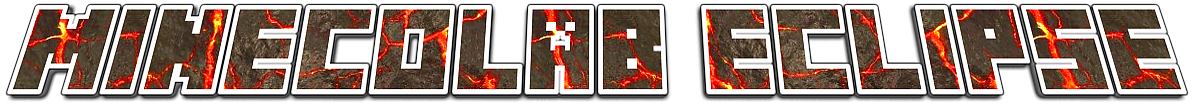


# SERVER 🌐

In [ ]:
# @title DOWNLOAD 💾

version = "1.19.2" # @param ["1.20.2", "1.20.1", "1.20", "1.19.4", "1.19.3", "1.19.2", "1.19.1", "1.19", "1.18.2", "1.18.1", "1.18", "1.17.1", "1.17", "1.16.5", "1.16.4", "1.16.3", "1.15.2", "1.14.4", "1.13.2", "1.12.2", "1.11.2", "1.10.2", "1.9.4", "1.8.8"]
server_type = "paper" # @param ["forge", "vanilla", "fabric", "paper"]
from google.colab import drive
import requests
import json
drive.mount('/content/drive')
! mkdir "/content/drive/My Drive/Minecraft-server"
%cd "/content/drive/My Drive/Minecraft-server"
if server_type == 'paper':
  a = requests.get("https://papermc.io/api/v2/projects/paper/versions/" + version)
  b = requests.get("https://papermc.io/api/v2/projects/paper/versions/" + version + "/builds/" + str(a.json()["builds"][-1]))
  print("https://papermc.io/api/v2/projects/paper/versions/" + version + "/builds/" + str(a.json()["builds"][-1]) + "/downloads/" + b.json()["downloads"]["application"]["name"])
  serverURL = "https://papermc.io/api/v2/projects/paper/versions/" + version + "/builds/" + str(a.json()["builds"][-1]) + "/downloads/" + b.json()["downloads"]["application"]["name"]
if server_type == 'forge':
  serverURL = "https://serverjars.com/api/fetchJar/modded/forge/" + version

if server_type == 'vanilla':
  serverURL = "https://serverjars.com/api/fetchJar/vanilla/vanilla/" + version

if server_type == 'fabric':
  serverURL = 'https://maven.fabricmc.net/net/fabricmc/fabric-installer/0.11.2/fabric-installer-0.11.2.jar'

jar_name = {'paper': 'server.jar', 'fabric': 'fabric-installer.jar', 'forge': 'forge.jar', 'vanilla': 'vanilla.jar'}

print('Dowloading...')

r = requests.get(serverURL)

if r.status_code == 200:
  with open('/content/drive/My Drive/Minecraft-server/' + jar_name[server_type], 'wb') as f:
    f.write(r.content)
else:
  print('Error '+ str(r.status_code) + '! Most likely you entered an unsupported version. Try running the code again if you think that shouldnt have happened.')
if server_type == 'fabric':
  !java -jar fabric-installer.jar server -mcversion $version -downloadMinecraft

if server_type == 'forge':
  %cd "/content/drive/My Drive/Minecraft-server"
  !java -jar forge.jar --installServer

if server_type == 'forgepaper (ONLY ON 1.16.5)':
  %cd "/content/drive/My Drive/Minecraft-server"
  !java -jar forge.jar --installServer
colabconfig = {"server_type": server_type,
               "server_version": version}
json.dump(colabconfig, open("colabconfig.json",'w'))

print('Complete!')

from google.colab import drive
drive.mount('/content/drive')

%cd "/content/drive/My Drive/Minecraft-server"
!echo "eula=true" >> eula.txt


In [ ]:
# @title START AND CONSOLE▶️
! pip install tqdm
import os
import re
import json
import glob
import subprocess
import time
from tqdm import tqdm

total_steps = 25
print("Preparing Linux machine")
def show_progress(step):
    return f"{step}/{total_steps} - Completed"
for step in tqdm(range(1, total_steps + 1), desc="Loading", ncols=100):
    if step == 1:
        subprocess.run(["sync"])
    elif step == 2:
        subprocess.run(["echo", "3", ">", "/proc/sys/vm/drop_caches"])
    elif step == 3:
        subprocess.run(["swapoff", "-a"])
    elif step == 4:
        subprocess.run(["swapon", "-a"])
    elif step == 5:
        subprocess.run(["sudo", "apt-get", "update"])
    elif step == 6:
        subprocess.run(["sudo", "apt-get", "upgrade", "-y"])
    elif step == 7:
        subprocess.run(["sudo", "apt-get", "autoremove", "-y"])
    elif step == 8:
        subprocess.run(["sudo", "apt-get", "clean"])
    elif step == 9:
        subprocess.run(["sudo", "apt-get", "clean"])
    elif step == 10:
        subprocess.run(["sudo", "rm", "-rf", "/tmp/*"])
    elif step == 11:
        subprocess.run(["sudo", "service", "nscd", "restart"])
    elif step == 12:
        subprocess.run(["sudo", "sysctl", "-w", "vm.swappiness=10"])  # Ajusta el valor según tus preferencias
    elif step == 13:
        subprocess.run(["sudo", "systemctl", "disable", "bluetooth.service"])
        subprocess.run(["sudo", "systemctl", "stop", "bluetooth.service"])
    elif step == 14:
        subprocess.run(["sudo", "sysctl", "-w", "vm.dirty_background_ratio=5"])
        subprocess.run(["sudo", "sysctl", "-w", "vm.dirty_ratio=10"])
    elif step == 15:
        subprocess.run(["sudo", "sysctl", "-w", "vm.swappiness=10"])
    elif step == 16:
        subprocess.run(["sudo", "systemctl", "disable", "service-name"])
        subprocess.run(["sudo", "systemctl", "stop", "service-name"])
    elif step == 17:
        subprocess.run(["sudo", "rm", "-rf", "/home/username/.cache/*"])
    elif step == 18:
        subprocess.run(["sudo", "apt-get", "clean", "package-localdb"])
    elif step == 19:
        subprocess.run(["sudo", "deborphan", "-n"])
    elif step == 20:
        subprocess.run(["sudo", "deborphan", "-n", "username"])
    elif step == 21:
        subprocess.run(["sudo", "sysctl", "-w", "vm.vfs_cache_pressure=50"])
    elif step == 22:
        subprocess.run(["sudo", "sysctl", "-w", "net.ipv4.tcp_window_scaling=1"])
        subprocess.run(["sudo", "sysctl", "-w", "net.ipv4.tcp_timestamps=1"])
        subprocess.run(["sudo", "sysctl", "-w", "net.ipv4.tcp_sack=1"])
        subprocess.run(["sudo", "sysctl", "-w", "net.ipv4.tcp_congestion_control=cubic"])
    elif step == 23:
        subprocess.run(["sudo", "find", "/var/log", "-type", "f", "-exec", "truncate", "-s", "0", "{}", ";"])
    elif step == 24:
        subprocess.run(["sudo", "cpupower", "frequency-set", "-g", "performance"])
    elif step == 25:
        subprocess.run(["sudo", "echo", "noop", ">", "/sys/block/sdX/queue/scheduler"])
overclock_command = "nvidia-settings -a '[gpu:0]/GPUGraphicsClockOffset[3]=100'"  # Ajusta el valor según tus necesidades
subprocess.run([overclock_command], shell=True)
subprocess.run(["echo", "performance", "|", "sudo", "tee", "/sys/devices/system/cpu/cpu*/cpufreq/scaling_governor"])
subprocess.run(["sudo", "sysctl", "-w", "vm.dirty_background_ratio=5"])
subprocess.run(["sudo", "sysctl", "-w", "vm.dirty_ratio=10"])
subprocess.run(["sudo", "sysctl", "-w", "vm.swappiness=10"])

!sudo apt update &>/dev/null && echo "apt cache successfully updated" || echo "apt cache update failed, you might receive stale packages"

from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/My Drive/Minecraft-server"
!ls

if os.path.isfile("colabconfig.json"):
  colabconfig = json.load(open("colabconfig.json"))
else:
  colabconfig = {"server_type": "generic"}
  json.dump(colabconfig, open("colabconfig.json",'w'))

# Install OpenJDK
# !wget -qO - https://adoptopenjdk.jfrog.io/adoptopenjdk/api/gpg/key/public | sudo apt-key add -
# !sudo add-apt-repository --yes https://adoptopenjdk.jfrog.io/adoptopenjdk/deb/ &>/dev/null || echo "Failed to add repo. Still can be ignored if openjdk17 gets installed."
version = colabconfig["server_version"]
if colabconfig["server_version"] < "1.17":
  !sudo apt-get purge openjdk* > /dev/null 2>&1
  !sudo apt-get install openjdk-8-jre-headless &>/dev/null && echo "Yay! Openjdk8 has been successfully installed." || echo "Failed to install OpenJdk8."
else:
  !sudo apt-get purge openjdk* > /dev/null 2>&1
  !sudo apt-get install openjdk-17-jre-headless &>/dev/null && echo "Yay! Openjdk17 has been successfully installed." || echo "Failed to install OpenJdk17."
java_ver = !java -version 2>&1 | awk -F[\"\.] -v OFS=. 'NR==1{print $2}'
if java_ver[0] == "17" :
  print("You are using JAVA 17.")
else:
  print("Estas utilizando una versión inferior a JAVA 17: ", java_ver[0], ". You are using a downgraded java version. Minecraft 1.17+ might not work.")
jar_list = {'paper': 'server.jar', 'fabric': 'fabric-installer.jar', 'forge': 'forge.jar', 'vanilla': 'vanilla.jar'}
jar_name = jar_list[colabconfig["server_type"]]
if colabconfig["server_type"] == "paper":
  server_flags = "-XX:+UseG1GC -XX:+ParallelRefProcEnabled -XX:MaxGCPauseMillis=200 -XX:+UnlockExperimentalVMOptions -XX:+DisableExplicitGC -XX:+AlwaysPreTouch -XX:G1NewSizePercent=30 -XX:G1MaxNewSizePercent=40 -XX:G1HeapRegionSize=8M -XX:G1ReservePercent=20 -XX:G1HeapWastePercent=5 -XX:G1MixedGCCountTarget=4 -XX:InitiatingHeapOccupancyPercent=15 -XX:G1MixedGCLiveThresholdPercent=90 -XX:G1RSetUpdatingPauseTimePercent=5 -XX:SurvivorRatio=32 -XX:+PerfDisableSharedMem -XX:MaxTenuringThreshold=1 -Dusing.aikars.flags=https://mcflags.emc.gs -Daikars.new.flags=true"
else:
  server_flags = ""
memory_allocation = "-Xms8704M -Xmx8704M"
tunnel_service = "ngrok" # @param ["ngrok","playit"]
# @markdown only with ngrok
Server_ngrok = "us" # @param ["us","in","jp","sa","eu","au","ap"]
print("Using", tunnel_service)
if tunnel_service == "ngrok":
  !pip -q install pyngrok
  from pyngrok import conf, ngrok
  print("https://dashboard.ngrok.com/auth")
  import getpass
  authtoken = "" # @param {type:"string"}
  ! ngrok authtoken $authtoken
# @markdown https://dashboard.ngrok.com/auth
# @markdown
# @markdown
# @markdown   ap - Asia/Pacific (Singapore)
# @markdown
# @markdown   au - Australia (Sydney)
# @markdown
# @markdown   eu - Europa (Frankfurt - Alemania)
# @markdown
# @markdown   in - India (Mumbai)
# @markdown
# @markdown   jp - Japan (Tokyo)
# @markdown
# @markdown   sa - America del sur (São Paulo - Brasil)
# @markdown
# @markdown   us - United States (Ohio)

  conf.get_default().region = (Server_ngrok)
  url = ngrok.connect(25565, 'tcp')
  print('IP:  ' + ((str(url).split('"')[1::2])[0]).replace('tcp://', ''))
elif tunnel_service == "playit":
  ! curl -SsL https://playit-cloud.github.io/ppa/key.gpg | sudo apt-key add -
  ! sudo curl -SsL -o /etc/apt/sources.list.d/playit-cloud.list https://playit-cloud.github.io/ppa/playit-cloud.list
  ! sudo apt update &>/dev/null && sudo apt install playit &>/dev/null && echo "Playit.gg instaled" || echo "Playit error"
  if colabconfig["server_type"] == "forge":
    version = colabconfig["server_version"]
    if colabconfig["server_version"] < "1.17":
      oldpathtoforge = glob.glob(f"/content/drive/My Drive/Minecraft-server/forge-{version}-*.jar")
      if oldpathtoforge:
        path = oldpathtoforge[0]
        print(path)
        ! playit & java $memory_allocation -jar "{path}" nogui
      else:
        print("No forge universal jar found.")
    else:
      pathtoforge = glob.glob(f"/content/drive/My Drive/Minecraft-server/libraries/net/minecraftforge/forge/{version}-*/unix_*.txt")
      if pathtoforge:
        path = pathtoforge[0]
        print(path)
        ! playit & java @user_jvm_args.txt "@{path}" "$@"
      else:
        print("No unix_args.txt found.")
  else:
    ! playit & java $memory_allocation $server_flags -jar $jar_name nogui

if colabconfig["server_type"] == "forge":
  version = colabconfig["server_version"]
  if colabconfig["server_version"] < "1.17":
    oldpathtoforge = glob.glob(f"/content/drive/My Drive/Minecraft-server/forge-{version}-*.jar")
    if oldpathtoforge:
      path = oldpathtoforge[0]
      print(path)
      !java $memory_allocation -jar "{path}" nogui
    else:
      print("No forge universal jar found.")
  else:
    pathtoforge = glob.glob(f"/content/drive/My Drive/Minecraft-server/libraries/net/minecraftforge/forge/{version}-*/unix_*.txt")
    if pathtoforge:
      path = pathtoforge[0]
      print(path)
      !java @user_jvm_args.txt "@{path}" "$@"
    else:
      print("No unix_args.txt found.")
else:
 !java $memory_allocation $server_flags -jar $jar_name nogui



In [ ]:
# @title SETTINGS ⚙️
from google.colab import drive
drive.mount('/content/drive')
server_properties_path = '/content/drive/My Drive/Minecraft-server/server.properties'

Server_moth = "Hello to my server" # @param {type:"string"}
Gamemode = "Creative" # @param ["Survival", "Creative", "Adventure", "Spectator"]
Difficulty = "Peaceful" # @param ["Peaceful", "Easy", "Normal", "Hard"]
Maxplayers = 100 # @param {type:"slider", min:0, max:100, step:1}
View_distance = 6 # @param {type:"slider", min:0, max:20, step:1}
simulation_distance = 6 # @param {type:"slider", min:0, max:20, step:1}
Premium = "false" # @param ["true", "false"]
Nether = "true" # @param ["true", "false"]
PVP = "true" # @param ["true", "false"]
with open(server_properties_path, 'r') as file:
    lines = file.readlines()
for i in range(len(lines)):
    if lines[i].startswith('gamemode='):
        lines[i] = 'gamemode=' + Gamemode.lower() + '\n'
    if lines[i].startswith('difficulty='):
        lines[i] = 'difficulty=' + Difficulty.lower() + '\n'
    if lines[i].startswith('max-players='):
        lines[i] = 'max-players=' + str(Maxplayers) + '\n'
    if lines[i].startswith('view-distance='):
        lines[i] = 'view-distance=' + str(View_distance) + '\n'
    if lines[i].startswith('simulation-distance='):
        lines[i] = 'simulation-distance=' + str(simulation_distance) + '\n'
    if lines[i].startswith('online-mode='):
        lines[i] = 'online-mode=' + Premium + '\n'
    if lines[i].startswith('allow-nether='):
        lines[i] = 'allow-nether=' + Nether + '\n'
    if lines[i].startswith('pvp='):
        lines[i] = 'pvp=' + PVP + '\n'
    if lines[i].startswith('motd='):
        lines[i] = 'motd=' + Server_moth + '\n'
with open(server_properties_path, 'w') as file:
    file.writelines(lines)
print("Configuration changed successfully.")

In [ ]:
# @title UPLOAD FILES 📤
from google.colab import drive
import shutil
from google.colab import files
from PIL import Image
import os
drive.mount('/content/drive')

select = "upload plugins"  # @param ["upload mods", "upload plugins", "upload server icon", "upload world"]
main_directory = '/content/drive/My Drive/Minecraft-server/'

if select == "upload server icon":
    uploaded = files.upload()
    if len(uploaded) > 0:
        file_name = list(uploaded.keys())[0]
        icon_path = os.path.join(main_directory, 'server-icon.png')
        try:
            image = Image.open(file_name)
            if image.format == 'PNG' and image.size == (64, 64):
                shutil.move(file_name, icon_path)
                print("The 'server-icon.png' file has been uploaded and saved to the specified location.")
            else:
                print("The file does not meet the format or size requirements (64x64 pixels). Converting and resizing...")
                image = image.convert("RGBA")
                image = image.resize((64, 64))
                image.save(icon_path, "PNG")
                print("The file has been converted and resized to meet the requirements.")
        except Exception as e:
            print("Error processing the image:", e)

    else:
        print("No files were uploaded.")

elif select == "upload world":
    uploaded = files.upload()
    if len(uploaded) > 0:
        file_name = list(uploaded.keys())[0]
        destination_directory = os.path.join(main_directory, 'world')
        if not os.path.exists(destination_directory):
            os.makedirs(destination_directory)
        shutil.move(file_name, os.path.join(destination_directory, file_name))
        print(f"The file '{file_name}' has been uploaded to the 'world' folder on Google Drive.")

elif select == "upload mods" or select == "upload plugins":
    uploaded = files.upload()
    if len(uploaded) > 0:
        file_name = list(uploaded.keys())[0]
        destination_directory = os.path.join(main_directory, select)
        if not os.path.exists(destination_directory):
            os.makedirs(destination_directory)
        shutil.move(file_name, os.path.join(destination_directory, file_name))
        print(f"The file '{file_name}' has been uploaded to the '{select}' folder on Google Drive.")
else:
    print("Invalid selection. Please choose a valid option.")




In [ ]:
# @title LOCAL BACKUP 📂
from google.colab import drive
drive.mount('/content/drive')
import shutil
import datetime
import zipfile
import os
from google.colab import files
drive.mount("/content/drive", force_remount=True)
print("Creating local backup")
directorio_original = "/content/drive/My Drive/Minecraft-server"
fecha_actual = datetime.datetime.now()
fecha_hora_formato = fecha_actual.strftime("%Y%m%d%H%M%S")
directorio_respaldo = f"/content/server_backup_{fecha_hora_formato}"
nombre_archivo_zip = f"server_backup_{fecha_hora_formato}.zip"

try:
    shutil.copytree(directorio_original, directorio_respaldo)
    with zipfile.ZipFile(nombre_archivo_zip, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for carpeta, subcarpetas, archivos in os.walk(directorio_respaldo):
            for archivo in archivos:
                archivo_completo = os.path.join(carpeta, archivo)
                archivo_relativo = os.path.relpath(archivo_completo, directorio_respaldo)
                zipf.write(archivo_completo, archivo_relativo)

    print(f"Local backup created and saved as {nombre_archivo_zip}")
    shutil.rmtree(directorio_respaldo)
    files.download(nombre_archivo_zip)

except Exception as e:
    print(f"Error creating local backup: {str(e)}")


In [ ]:
# @title DELETTE ALL DATA ⚠️
import shutil
import os
from google.colab import drive
drive.mount('/content/drive')
server_folder_path = "/content/drive/My Drive/Minecraft-server"
shutil.rmtree(server_folder_path, ignore_errors=True)
config_file_path = "/content/drive/My Drive/Minecraft-server/colabconfig.json"
if os.path.exists(config_file_path):
    os.remove(config_file_path)
for root, dirs, files in os.walk(server_folder_path):
    for file in files:
        file_path = os.path.join(root, file)
        try:
            os.remove(file_path)
        except Exception as e:
            print(f'Error {file_path}: {str(e)}')
print('DELETED')